In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor




# 1. Load Data

In [2]:
train_data=pd.read_csv('./kaggle/train.csv')
test_data=pd.read_csv('./kaggle/test.csv')



In [3]:
data_all_features = pd.concat((train_data.iloc[:, 0:-1], test_data.iloc[:, 0:]))



### Transform categorical data to numeric data using one-hot encoded

In [4]:
cat_cols=[cat for cat in data_all_features.columns if data_all_features[cat].dtype=='object']
num_cols=[cat for cat in data_all_features.columns if 
           data_all_features[cat].dtype=='int64' or 
           data_all_features[cat].dtype=='float64']


In [5]:
data_all_features_1 = pd.get_dummies(data_all_features,columns=cat_cols,drop_first=True)
data_all_features_1



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


### Fit missing data to dataset

In [6]:
si=SimpleImputer()
data_all_features_2 = si.fit_transform(data_all_features_1)



In [7]:
Y_orig = train_data['SalePrice'].iloc[:]
X_orig = data_all_features_2[:1460,:]
test_orig = data_all_features_2[1460:,:]

In [8]:
print(X_orig.shape)
print(Y_orig.shape)

(1460, 246)
(1460,)


# 2. Feature Selection


In [10]:
features = list(data_all_features_1.columns)



In [11]:
len(features)

246

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [13]:
# feature selection
def select_features(X_train, y_train, features):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=150)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    mask = fs.get_support() #list of booleans
    drop_features = [] # The list of your drop features

    for bool, feature in zip(mask, features):
        if not(bool):
            drop_features.append(feature)
    return drop_features,fs

In [14]:
drop_features, fs = select_features(X_orig,Y_orig,features)

Feature 0: 0.700676
Feature 1: 10.431466
Feature 2: 184.085225
Feature 3: 109.090355
Feature 4: 2436.770591
Feature 5: 8.891623
Feature 6: 548.665821
Feature 7: 504.714855
Feature 8: 425.293347
Feature 9: 255.923517
Feature 10: 0.188780
Feature 11: 70.303948
Feature 12: 880.341282
Feature 13: 845.524488
Feature 14: 165.561151
Feature 15: 0.956600
Feature 16: 1470.585010
Feature 17: 79.300912
Feature 18: 0.413789
Feature 19: 668.430296
Feature 20: 128.018964
Feature 21: 42.456412
Feature 22: 27.437234
Feature 23: 580.762801
Feature 24: 406.503866
Feature 25: 415.793392
Feature 26: 1013.705666
Feature 27: 926.951287
Feature 28: 171.494673
Feature 29: 161.577391
Feature 30: 24.509275
Feature 31: 2.903843
Feature 32: 18.336600
Feature 33: 12.556221
Feature 34: 0.654934
Feature 35: 3.150172
Feature 36: 1.220661
Feature 37: 11.892832
Feature 38: 6.268522
Feature 39: 93.156358
Feature 40: 131.935234
Feature 41: 2.459290
Feature 42: 1.115961
Feature 43: 23.557089
Feature 44: 1.968612
Feature 4

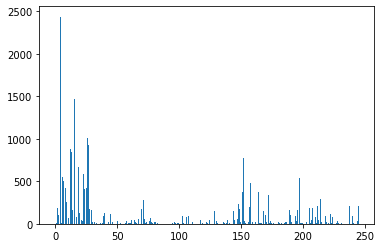

In [15]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [16]:
fil_data = data_all_features_1.drop(columns=drop_features, axis=1)
fil_data.shape



(2919, 150)

# 3. Split data for training model

In [17]:
si=SimpleImputer()
fil_data = si.fit_transform(fil_data)

In [18]:
Y = train_data['SalePrice'].iloc[:]
X = fil_data[:1460,:]
test = fil_data[1460:,:]

In [19]:
print(X.shape)
print(Y.shape)
print(test.shape)

(1460, 150)
(1460,)
(1459, 150)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=50)
y_train

1109    280000
93      133900
840     140000
521     150000
117     155000
         ...  
229     192500
70      244000
132     150750
1313    333168
109     190000
Name: SalePrice, Length: 1095, dtype: int64

In [21]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, Y_orig, test_size=0.25)
y_train_orig

675     148500
1159    185000
19      139000
494      91300
1287    190000
         ...  
1316    295493
715     165000
478     297000
1059    220000
865     148500
Name: SalePrice, Length: 1095, dtype: int64

In [22]:
print(X_train.shape)
print(X_test.shape)

(1095, 150)
(365, 150)


# 4. Fitting model

In [23]:
def compute_mse(model,X,y):
    predicts = model.predict(X)
    return ((predicts-y)**2).sum()/y.shape[0]
    

### Tune number of tree 

In [24]:
tree_nos = []
for n in range(50,400):
    if(n%20==0):
        tree_nos.append(n)
tree_nos

[60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380]

In [25]:
xgboost_model_ar = []
for tree_no in range(50,400):
    if(tree_no%20==0):
        model = XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=tree_no,
                             min_child_weight=1,
                             subsample=0.8,
                             reg_lambda = 0.45, 
                             colsample_bytree = 0.8,
                             reg_alpha = 0, 
                             gamma = 0,
                             scale_pos_weight = 1,
                             objective='reg:squarederror')
        model.fit(X_train,y_train)
        xgboost_model_ar.append(model)




In [26]:
test_errors = []
for model in xgboost_model_ar:
    test_errors.append(compute_mse(model,X_test,y_test))
    print(model.score(X_test,y_test))

0.916852914257038
0.9183404400035432
0.9192247091704497
0.9183437630676984
0.918629352563765
0.9185280521916518
0.9187346909431824
0.918701387464781
0.9185781737191284
0.918721727633347
0.9187893268765548
0.9187267734846387
0.9187104439210425
0.9187459661055184
0.9187431082448915
0.9187732803217146
0.9188784473532517


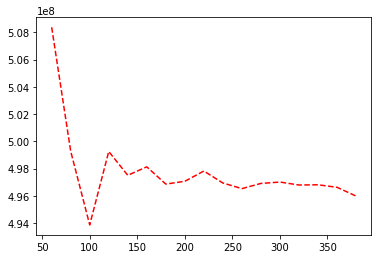

In [27]:
plt.plot(tree_nos,test_errors,'r--')




In [28]:
train_errors = []
for model in xgboost_model_ar:
    train_errors.append(compute_mse(model,X_train,y_train))
    print(model.score(X_train,y_train))
    

0.9841004163071555
0.9887345626952866
0.9916449802455217
0.9938534031895966
0.9953734607520969
0.9965541181418287
0.9974110225409277
0.9980158045445026
0.9984747019023489
0.9987772310434438
0.998984608745422
0.9991813785554711
0.9993445981224799
0.9994805209159919
0.9995924705391448
0.9996786335271378
0.9997415054694269


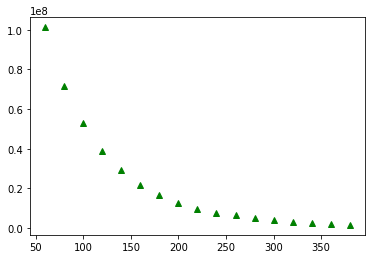

In [29]:
plt.plot(tree_nos,train_errors,'g^')

#### Select number of estimators n = 100

### Tune tree_depth and min_child_weight

In [59]:
tree_depths = []
for n in range(2,10):
    tree_depths.append(n)
# len(tree_depths)


In [60]:
min_child_weight = []
for n in range(2,10):
    min_child_weight.append(n)
min_child_weight


[2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
xgboost_model_ar = []
for tree_d in tree_depths:
    for min_child_w in min_child_weight:
        model = XGBRegressor(learning_rate=0.1,
                             max_depth=tree_d,
                             n_estimators=100,
                             min_child_weight=min_child_w,
                             subsample=0.8,
                             reg_lambda = 0.45, 
                             colsample_bytree = 0.8,
                             reg_alpha = 0, 
                             gamma = 0,
                             scale_pos_weight = 1,
                             objective='reg:squarederror')
        model.fit(X_train,y_train)
        xgboost_model_ar.append(model)



In [62]:
test_errors = [[0 for x in range(8)] for y in range(8)]
print(test_errors)
for i, tree_d in enumerate(tree_depths):
    for j,min_child_w in enumerate(min_child_weight):
        print('Score with: tree_depth = ' + str(tree_d)  +', min_child_weight = '+ str(min_child_w) + ':')
        test_errors[i][j] = xgboost_model_ar[i*len(min_child_weight)+j].score(X_test,y_test)
        print(test_errors[i][j])

max_v = 0
max_i = 0
max_j = 0
for i in range(8):
    for j in range(8):
        if max_v < test_errors[i][j]:
            max_v = test_errors[i][j]
            max_i = i;
            max_j = j;
print('Maximum value:' + str(max_v))
print('Tree depth:' + str(tree_depths[max_i]))
print('Min_child_weight:' + str(min_child_weight[max_j]))

# for model in xgboost_model_ar:
#     test_errors.append(compute_mse(model,X_test,y_test))
#     print(model.score(X_test,y_test))





[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
Score with: tree_depth = 2, min_child_weight = 2:
0.897715186248786
Score with: tree_depth = 2, min_child_weight = 3:
0.8770413723906659
Score with: tree_depth = 2, min_child_weight = 4:
0.886742865906047
Score with: tree_depth = 2, min_child_weight = 5:
0.893222910087458
Score with: tree_depth = 2, min_child_weight = 6:
0.8980214428219326
Score with: tree_depth = 2, min_child_weight = 7:
0.9006181368613403
Score with: tree_depth = 2, min_child_weight = 8:
0.9023110147664491
Score with: tree_depth = 2, min_child_weight = 9:
0.9029293421225162
Score with: tree_depth = 3, min_child_weight = 2:
0.9120442874559221
Score with: tree_depth = 3, min_child_weight = 3:
0.909246985257444
Score with: tree_depth = 3, min_child_weight = 4:
0.9026359391960719
Score with: tree_depth = 3, min_chil

#### Select tree_depth = 6 min_child_weight = 7

###  Tune sub_sample and colsample

In [63]:
sub_samples = []
for n in range(6,10):
    sub_samples.append(n/10)
sub_samples



[0.6, 0.7, 0.8, 0.9]

In [64]:
colsamples = []
for n in range(6,10):
    colsamples.append(n/10)
colsamples



[0.6, 0.7, 0.8, 0.9]

In [65]:
xgboost_model_ar = []
# for i, value in enumerate(new_list):
for sub_sample in sub_samples:
    for colsample in colsamples:
        model = XGBRegressor(learning_rate=0.1,
                             max_depth=6,
                             n_estimators=100,
                             min_child_weight=7,
                             subsample=sub_sample,
                             reg_lambda = 0.45, 
                             colsample_bytree = colsample,
                             reg_alpha = 0, 
                             gamma = 0,
                             scale_pos_weight = 1,
                             objective='reg:squarederror')
        model.fit(X_train,y_train)
        xgboost_model_ar.append(model)

    

In [66]:
test_errors = [[0 for x in range(4)] for y in range(4)]
print(test_errors)
for i, sub_sample in enumerate(sub_samples):
    for j,colsample in enumerate(colsamples):
        print('Score with: sub_sample = ' + str(sub_sample)  +', colsample = '+ str(colsample) + ':')
        test_errors[i][j] = xgboost_model_ar[i*len(colsamples)+j].score(X_test,y_test)
        print(test_errors[i][j])

max_v = 0
max_i = 0
max_j = 0
for i in range(4):
    for j in range(4):
        if max_v < test_errors[i][j]:
            max_v = test_errors[i][j]
            max_i = i
            max_j = j
print('Maximum value:' + str(max_v))
print('Sub_sample:' + str(sub_samples[max_i]))
print('ColSample:' + str(colsamples[max_j]))




[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Score with: sub_sample = 0.6, colsample = 0.6:
0.9188370003476318
Score with: sub_sample = 0.6, colsample = 0.7:
0.9142640216302182
Score with: sub_sample = 0.6, colsample = 0.8:
0.920792961685437
Score with: sub_sample = 0.6, colsample = 0.9:
0.9156203862924138
Score with: sub_sample = 0.7, colsample = 0.6:
0.9212311096586527
Score with: sub_sample = 0.7, colsample = 0.7:
0.915085968720314
Score with: sub_sample = 0.7, colsample = 0.8:
0.9209830482335067
Score with: sub_sample = 0.7, colsample = 0.9:
0.9108050294715163
Score with: sub_sample = 0.8, colsample = 0.6:
0.9110984093514755
Score with: sub_sample = 0.8, colsample = 0.7:
0.9162249343825081
Score with: sub_sample = 0.8, colsample = 0.8:
0.9222575419988016
Score with: sub_sample = 0.8, colsample = 0.9:
0.9156194858683251
Score with: sub_sample = 0.9, colsample = 0.6:
0.9165080713800119
Score with: sub_sample = 0.9, colsample = 0.7:
0.914890701346168
Score with: sub_sample

#### Select sub_sample = 0.8 colsample = 0.8

### Tune regularization

In [76]:
lambdas = []
for n in range(0,10):
    lambdas.append(n)
lambdas 




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [79]:
xgboost_model_ar = []
for lamda in lambdas:
    model = XGBRegressor(learning_rate=0.1,
                         max_depth=6,
                         n_estimators=100,
                         min_child_weight=7,
                         subsample=0.8,
                         reg_lambda = lamda, 
                         colsample_bytree = 0.8,
                         reg_alpha = 0, 
                         gamma = 0,
                         scale_pos_weight = 1,
                         objective='reg:squarederror')
    model.fit(X_train,y_train)
    xgboost_model_ar.append(model)


0
1
2
3
4
5
6
7
8
9


In [80]:
test_errors = []
for model in xgboost_model_ar:
    test_errors.append(compute_mse(model,X_test,y_test))
    print(model.score(X_test,y_test))


0.9173651391787389
0.9082145301148676
0.9144367863433305
0.9151368350298585
0.9121130381706163
0.9177989729019121
0.9189302620832134
0.9192638752333768
0.9136410137034219
0.9126146339064793


In [81]:
train_errors = []
for model in xgboost_model_ar:
    train_errors.append(compute_mse(model,X_train,y_train))
    print(model.score(X_train,y_train))

0.9841227621867403
0.98344413763125
0.980296572759758
0.9797031308856852
0.976873916094209
0.9756362180283495
0.9735306091252091
0.9715817244283002
0.9703174525025994
0.9699807815310593


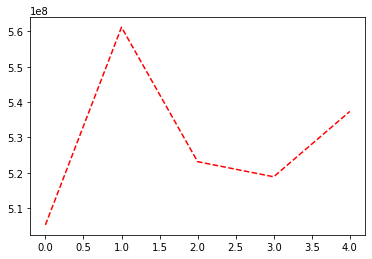

In [44]:
plt.plot(lambdas,test_errors,'r--')


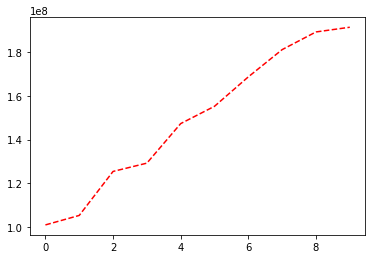

In [82]:
plt.plot(lambdas,train_errors,'r--')



#### Select lambda = 0.45

### Final model for XGBoost

In [83]:
model = XGBRegressor(learning_rate=0.1,
                         max_depth=6,
                         n_estimators=100,
                         min_child_weight=7,
                         subsample=0.8,
                         reg_lambda = 0.45, 
                         colsample_bytree = 0.8,
                         reg_alpha = 0, 
                         gamma = 0,
                         scale_pos_weight = 1,
                         objective='reg:squarederror')
model.fit(X_train_orig,y_train_orig)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.45, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
model.score(X_train_orig,y_train_orig)

0.9853963494861018

In [85]:
model.score(X_test_orig,y_test_orig)

0.8323989798363503

In [87]:
compute_mse(model,X_test_orig,y_test_orig)

1043228985.5604496

In [88]:
model = XGBRegressor(learning_rate=0.1,
                             max_depth=6,
                             n_estimators=160,
                             min_child_weight=7,
                             subsample=0.8,
                             reg_lambda = 0.45, 
                             colsample_bytree = 0.8,
                             reg_alpha = 0, 
                             gamma = 0,
                             scale_pos_weight = 1,
                             objective='reg:squarederror')
model.fit(X_train,y_train)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=160, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.45, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
model.score(X_test,y_test)

0.923373618714471

## Linear Regression Model

#### Fit with original dataset

In [326]:
from sklearn.linear_model import LinearRegression

In [327]:
linear_model = LinearRegression().fit(X_train_orig,y_train_orig)

In [328]:
linear_model.score(X_train_orig,y_train_orig)

0.9276930245887912

In [329]:
linear_model.score(X_test_orig,y_test_orig)

0.6685767790733652

In [330]:
compute_mse(linear_model,X_test_orig,y_test_orig)

2006347629.543853

#### Fit with filtered data

In [331]:
linear_model = LinearRegression().fit(X_train,y_train)

In [333]:
linear_model.score(X_train,y_train)

0.8860441640674173

In [334]:
linear_model.score(X_test,y_test)

0.8974463085288559

In [335]:
compute_mse(linear_model,X_test,y_test)

627028673.7877725